# 고객 데이터 분석
- 고객 분류 
- 매출량 예측 모델 생성

## Data Import
- sales: 주문 총 금액 (discount 반영)
- profit: 주문 이익
- 

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/han942/vscode/refs/heads/main/datafile/%5BDArt-B%205%EA%B8%B0%5D%20Global_Supermarket.csv')
data.head()

,customer_id,customer_name,customer_segment,order_id,order_city,oreder_region,order_date,order_year,order_weeknum,quantity,...,discount,category,sub_category,market_country,market_area,market_city,ship_date,ship_mode,shipping_cost,row_id
0,LS-172304,Lycoris Saunders,Consumer,CA-2019-130813,Los Angeles,West,2019-01-07,2019,2,3,...,0.0,Office Supplies,Paper,United States,US,California,2019-01-09,Second Class,4.37,36624
1,MV-174854,Mark Van Huff,Consumer,CA-2019-148614,Los Angeles,West,2019-01-21,2019,4,2,...,0.0,Office Supplies,Paper,United States,US,California,2019-01-26,Standard Class,0.94,37033
2,CS-121304,Chad Sievert,Consumer,CA-2019-118962,Los Angeles,West,2019-08-05,2019,32,3,...,0.0,Office Supplies,Paper,United States,US,California,2019-08-09,Standard Class,1.81,31468
3,CS-121304,Chad Sievert,Consumer,CA-2019-118962,Los Angeles,West,2019-08-05,2019,32,2,...,0.0,Office Supplies,Paper,United States,US,California,2019-08-09,Standard Class,4.59,31469
4,AP-109154,Arthur Prichep,Consumer,CA-2019-146969,Los Angeles,West,2019-09-29,2019,40,1,...,0.0,Office Supplies,Paper,United States,US,California,2019-10-03,Standard Class,1.32,32440


In [2]:
data.rename(columns={'oreder_region':'order_region'},inplace=True)
data.columns

Index(['customer_id', 'customer_name', 'customer_segment', 'order_id',
       'order_city', 'order_region', 'order_date', 'order_year',
       'order_weeknum', 'quantity', 'sales', 'product_id', 'product_name',
       'profit', 'discount', 'category', 'sub_category', 'market_country',
       'market_area', 'market_city', 'ship_date', 'ship_mode', 'shipping_cost',
       'row_id'],
      dtype='object')

In [3]:
data.shape

(51290, 24)

## EDA

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

### 1. Customer Information

In [5]:
print('Unique 고객 ID:',data['customer_id'].nunique())
print('Unique 고객 이름:',data['customer_name'].nunique())

Unique 고객 ID: 4873
Unique 고객 이름: 795


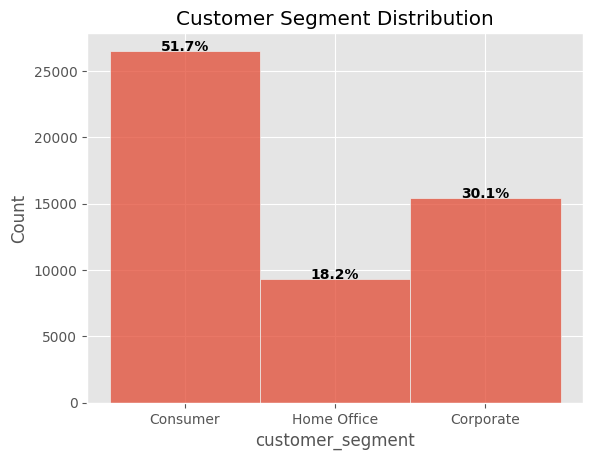

In [6]:
ax = sns.histplot(data['customer_segment'], stat='count')
plt.title('Customer Segment Distribution', loc='center')

# 각 바의 상단 중앙에 비율 표시
total = len(data['customer_segment'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center",weight='bold')

### 2. Order Information

In [7]:
print('Unqiue order_id:',data['order_id'].nunique())

Unqiue order_id: 25035


#### 2-1. 지역별 특성
- google map으로 EDA할수도 있을듯

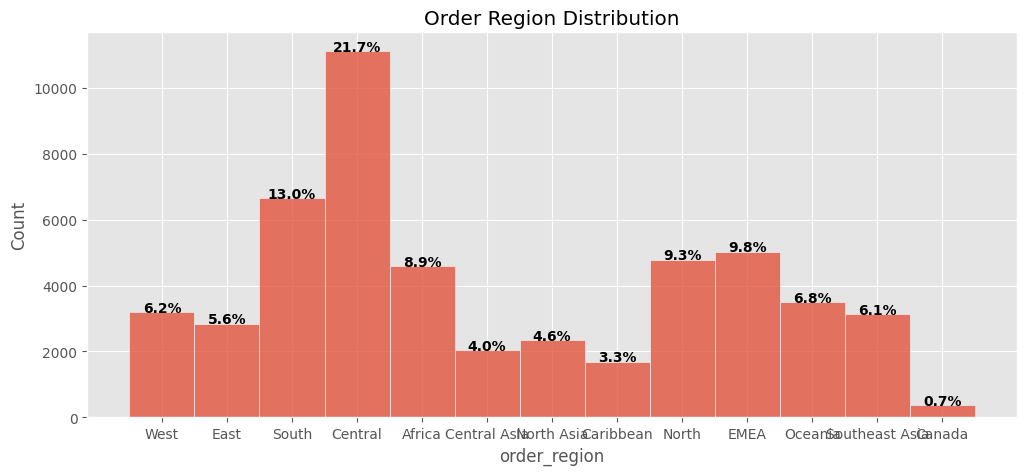

In [8]:
plt.figure(figsize=(12,5))
ax = sns.histplot(data['order_region'], stat='count')
plt.title('Order Region Distribution', loc='center')

# 각 바의 상단 중앙에 비율 표시
total = len(data['order_region'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

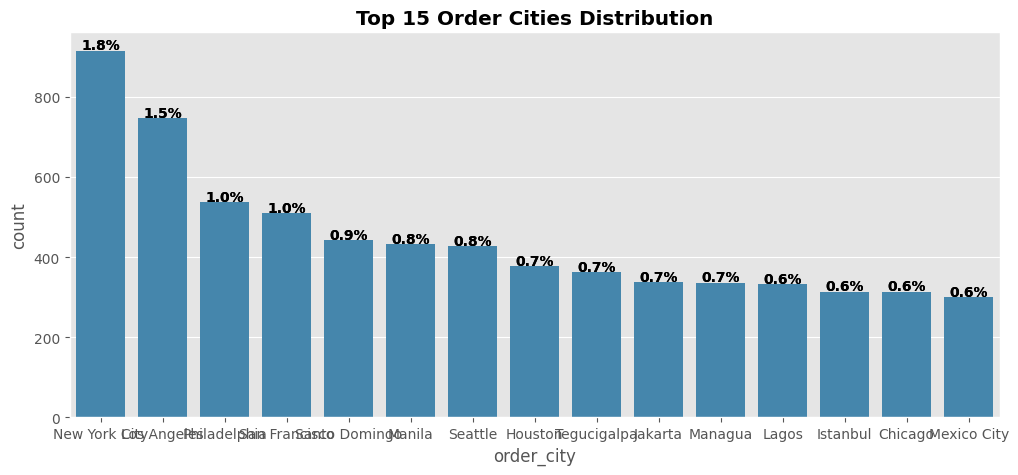

In [9]:
plt.figure(figsize=(12,5))
sns.barplot(data['order_city'].value_counts(ascending=False)[:15])
# 각 바의 상단 중앙에 비율 표시
total_orders = len(data)
ax = sns.barplot(data['order_city'].value_counts(ascending=False)[:15])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_orders:.1%}', ha="center", weight='bold')
plt.title('Top 15 Order Cities Distribution', loc='center',weight='bold')
plt.show()

#### 2-2. 시간적 특성

Text(0.5, 1.0, 'Sales by Timestamps')

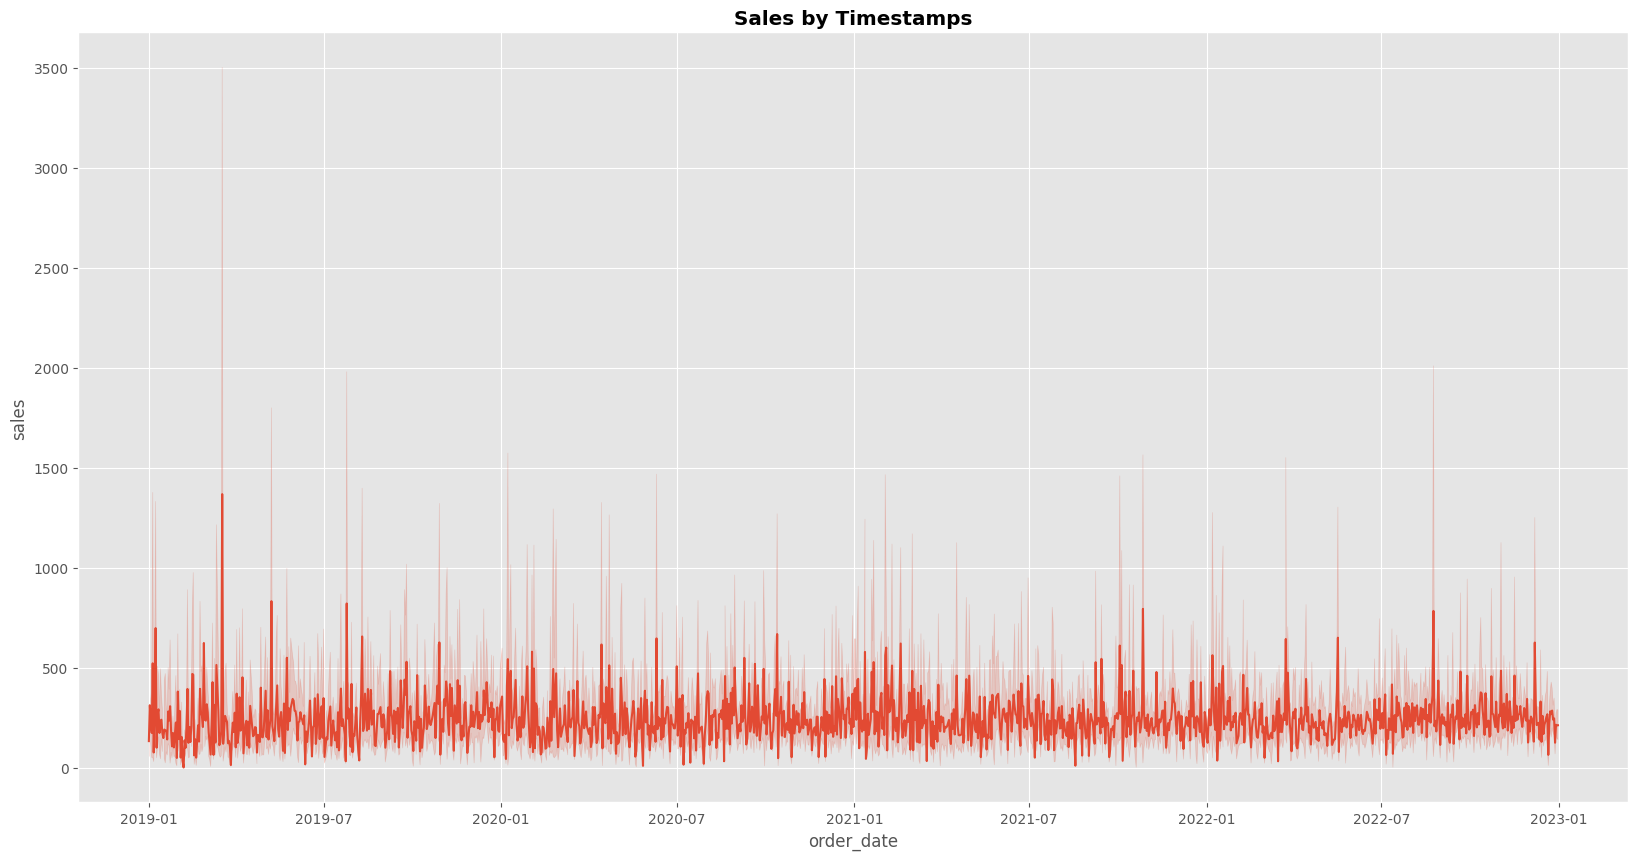

In [ ]:
plt.figure(figsize=(20,10))
data['order_date'] = pd.to_datetime(data['order_date'])
sns.lineplot(x=data['order_date'], y=data['profit'])

# 최댓값, 최솟값 y축에 선 그리기
plt.title('Profit by Timestamps', weight='bold', loc='center')

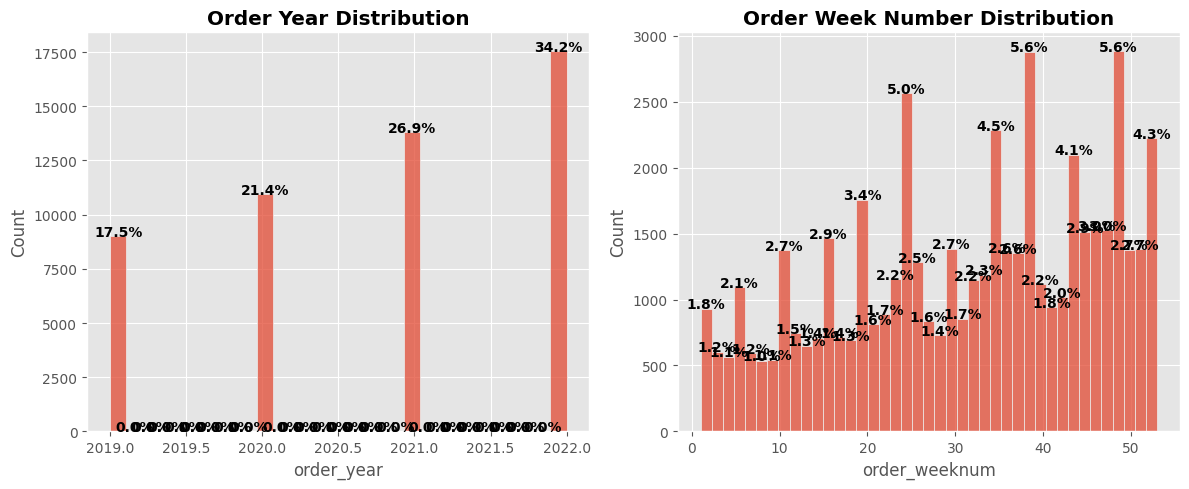

In [11]:
fig, axes = plt.subplots(1,2,figsize=(12,5))

# Plot for 'order_year'
ax = sns.histplot(data['order_year'], stat='count', ax=axes[0])
axes[0].set_title('Order Year Distribution', loc='center', weight='bold')

# 각 바의 상단 중앙에 비율 표시
total = len(data['order_year'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

# Plot for 'order_weeknum'
ax = sns.histplot(data['order_weeknum'], stat='count', ax=axes[1])
axes[1].set_title('Order Week Number Distribution', loc='center', weight='bold')

# 각 바의 상단 중앙에 비율 표시
total = len(data['order_weeknum'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

plt.tight_layout()

#### 2-3. Sales

Text(0.5, 1.0, 'Zoom-In Sales Dist')

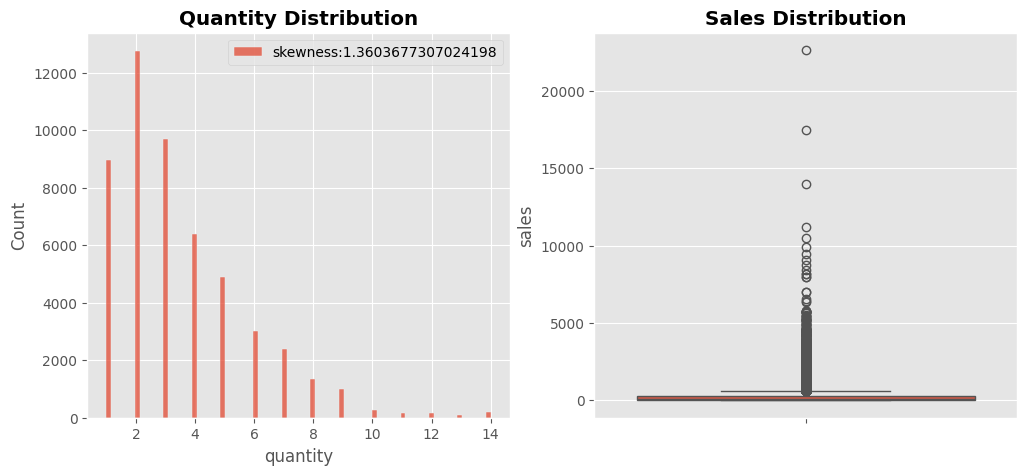

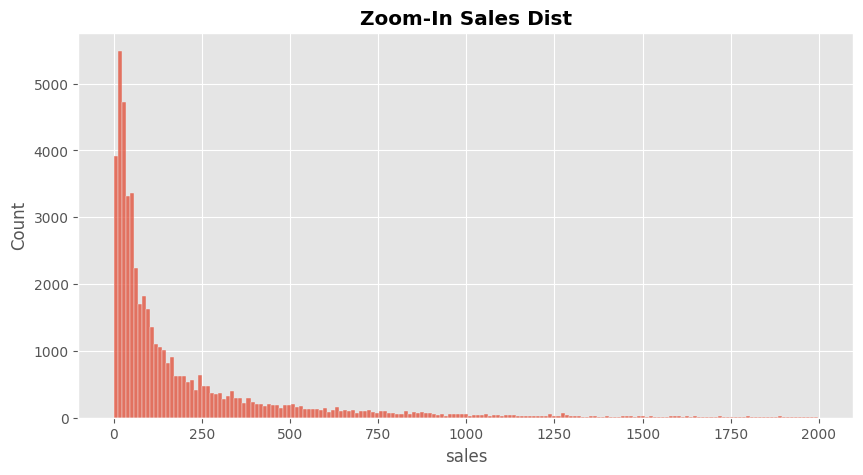

In [12]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax = ax.flatten()

sns.histplot(data['quantity'], ax=ax[0], label=f"skewness:{data['quantity'].skew()}")
ax[0].set_title('Quantity Distribution',weight='bold',loc='center')
ax[0].legend()
sns.boxplot(data['sales'], ax=ax[1])
ax[1].set_title('Sales Distribution', weight = 'bold', loc = 'center')

plt.figure(figsize=(10,5))
sns.histplot(data['sales'].loc[data['sales']<2000])
plt.title('Zoom-In Sales Dist',weight='bold')

Text(0.5, 1.0, 'Discount Distribution')

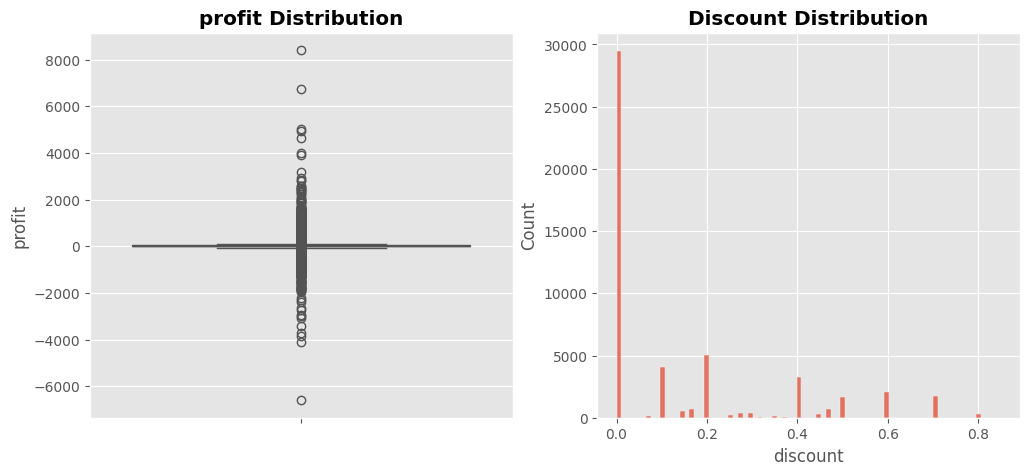

In [13]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax = ax.flatten()

sns.boxplot(data['profit'],ax=ax[0])
sns.histplot(data['discount'],ax=ax[1])
ax[0].set_title('profit Distribution',weight='bold')
ax[1].set_title('Discount Distribution',weight='bold')

Text(0.5, 1.0, 'regplot btw profit-Discount')

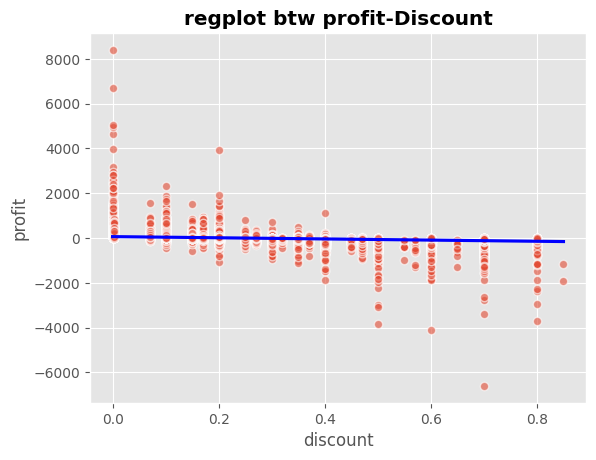

In [85]:
sns.regplot(x=data['discount'],y=data['profit'],line_kws={'color':'blue'},scatter_kws=dict(alpha=0.6,edgecolors='white'),ci=False)
plt.title('regplot btw profit-Discount',weight='bold')

### 3.Product

In [15]:
print('Unique product ID:',data['product_id'].nunique())
print('Unique product names:',data['product_name'].nunique())

Unique product ID: 10292
Unique product names: 3788


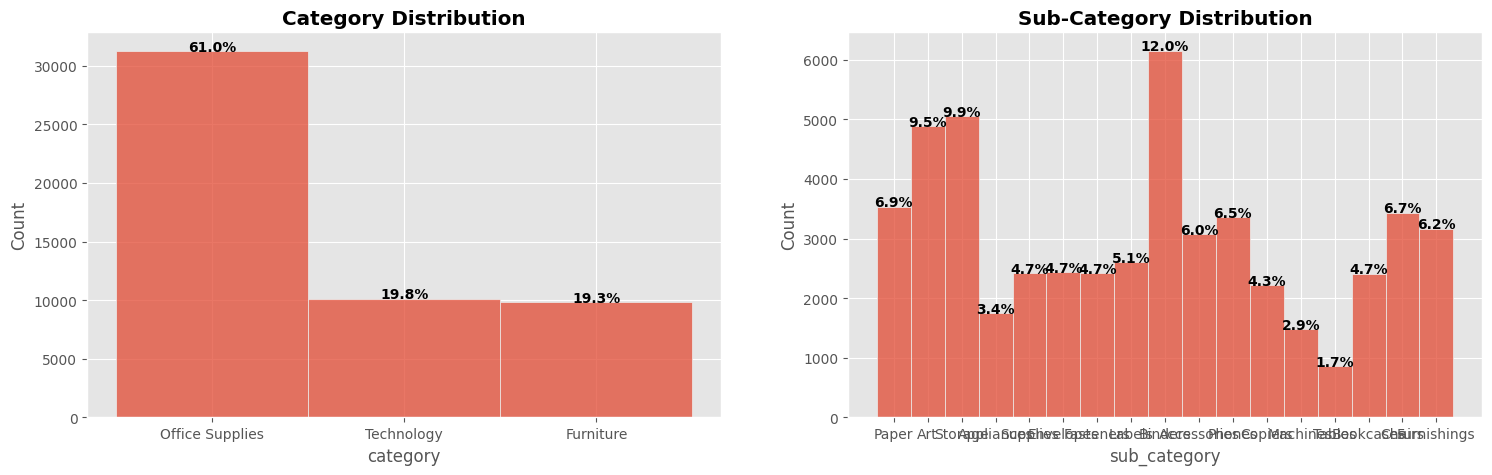

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot for 'category'
sns.histplot(data['category'], ax=axes[0])
axes[0].set_title('Category Distribution', weight='bold', loc='center')

total = len(data['category'])
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

sns.histplot(data['sub_category'], ax=axes[1])
axes[1].set_title('Sub-Category Distribution', weight='bold', loc='center')

total = len(data['sub_category'])
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

### 4. Supermarket

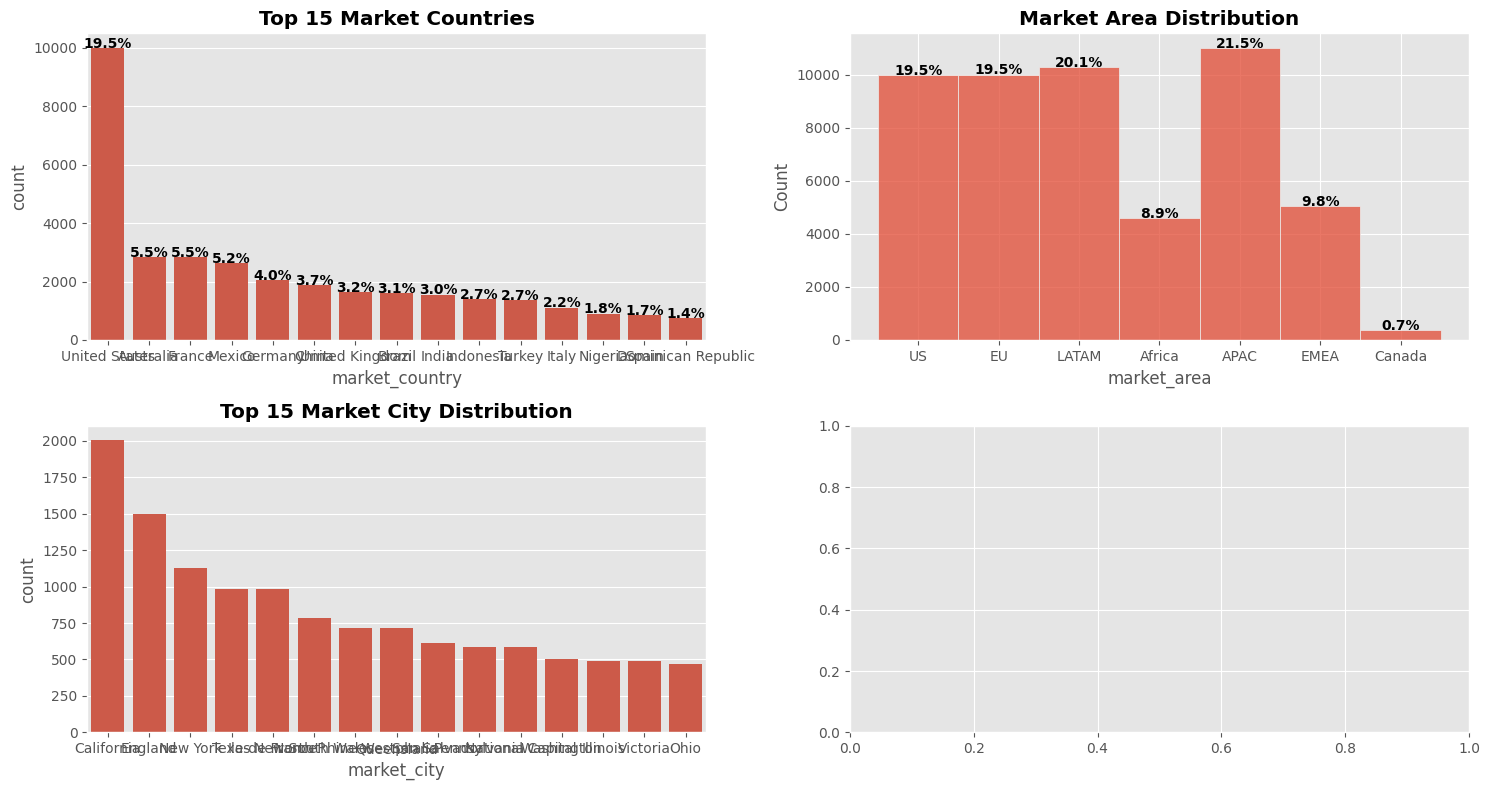

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()
# Plot for 'market_country'
sns.barplot(data['market_country'].value_counts()[:15], ax=axes[0])
axes[0].set_title('Top 15 Market Countries', weight='bold', loc='center')


# Plot for 'market_area'
sns.histplot(data['market_area'], ax=axes[1])
axes[1].set_title('Market Area Distribution', weight='bold', loc='center')
# 각 바의 상단 중앙에 비율 표시
for i,col in enumerate(list(['market_country','market_area'])):    
    total = len(data[col])
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

# Plot for 'market_city'
sns.barplot(data['market_city'].value_counts()[:15], ax=axes[2])
axes[2].set_title('Top 15 Market City Distribution', weight='bold', loc='center')

plt.tight_layout()
plt.show()

### 5. Shipping
- 운송 과정에서 걸린 시간을 추가 feature로 넣으면 좋을듯

<Axes: xlabel='ship_date', ylabel='profit'>

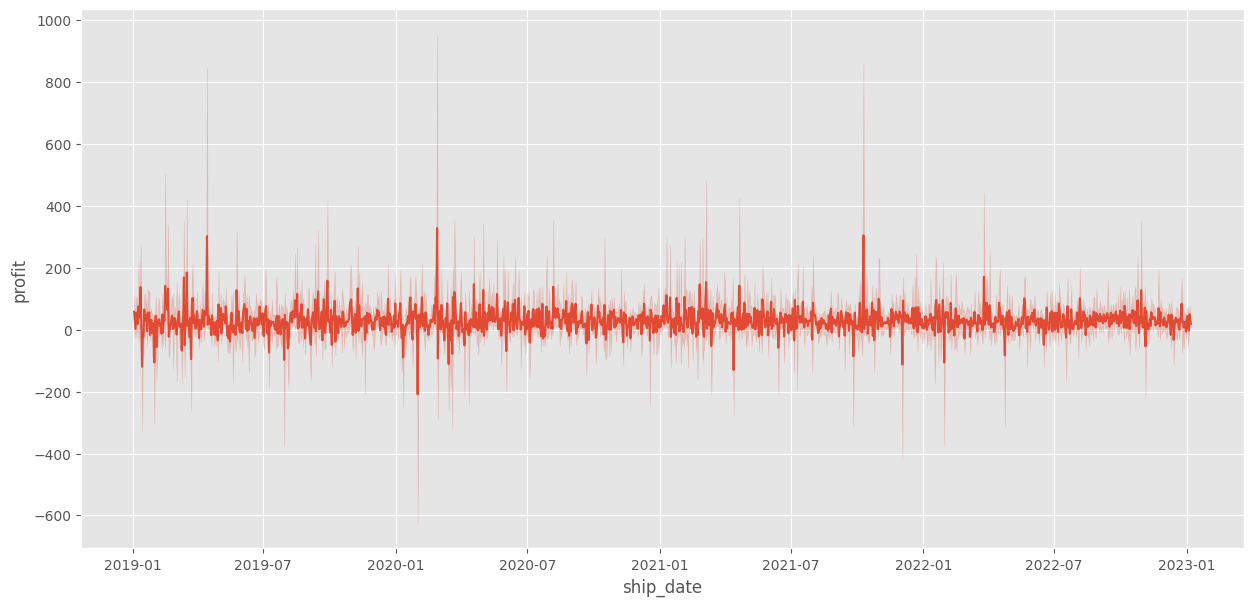

In [18]:
plt.figure(figsize=(15,7))
data['ship_date'] = pd.to_datetime(data['ship_date'])
sns.lineplot(data=data,x='ship_date',y='profit')

Text(0.5, 1.0, 'Shipping Cost Distribution')

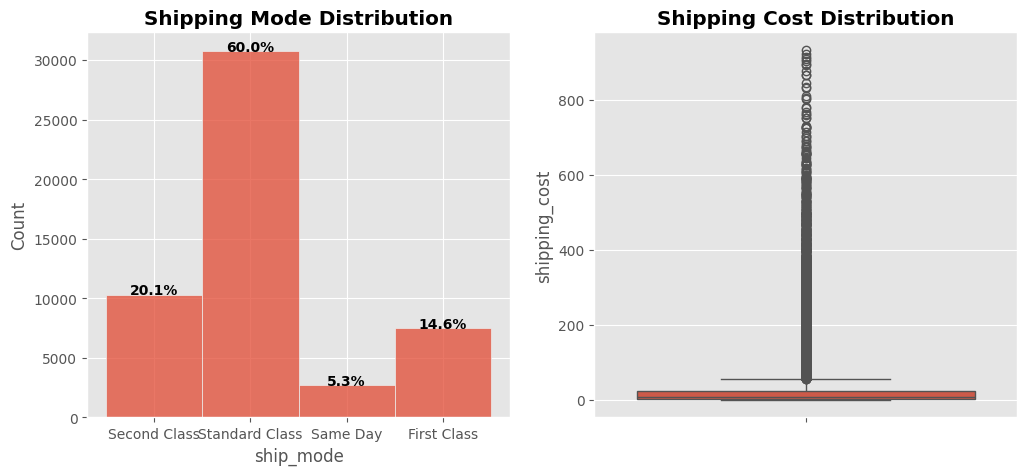

In [19]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(data['ship_mode'],ax=ax[0])
ax[0].set_title('Shipping Mode Distribution',weight='bold')
total = len(data['ship_mode'])
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

sns.boxplot(data['shipping_cost'],ax=ax[1])
ax[1].set_title('Shipping Cost Distribution',weight='bold')

### Correlation Analysis

In [20]:
data.columns

Index(['customer_id', 'customer_name', 'customer_segment', 'order_id',
       'order_city', 'order_region', 'order_date', 'order_year',
       'order_weeknum', 'quantity', 'sales', 'product_id', 'product_name',
       'profit', 'discount', 'category', 'sub_category', 'market_country',
       'market_area', 'market_city', 'ship_date', 'ship_mode', 'shipping_cost',
       'row_id'],
      dtype='object')

In [21]:
ind_col = ['customer_id','customer_name','order_id',]
cat_col = ['customer_id','customer_name','customer_segment','order_id','order_city','order_region',
           'order_date','order_year','order_weeknum','product_id','product_name','market_area','market_city',
           'ship_date','ship_mode','category','sub_category','market_country']
con_col = ['quantity','sales','shipping_cost','profit','discount','row_id']

In [22]:
data_c = data.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_c[cat_col] = data_c[cat_col].apply(lambda x:le.fit_transform(x))

<Axes: >

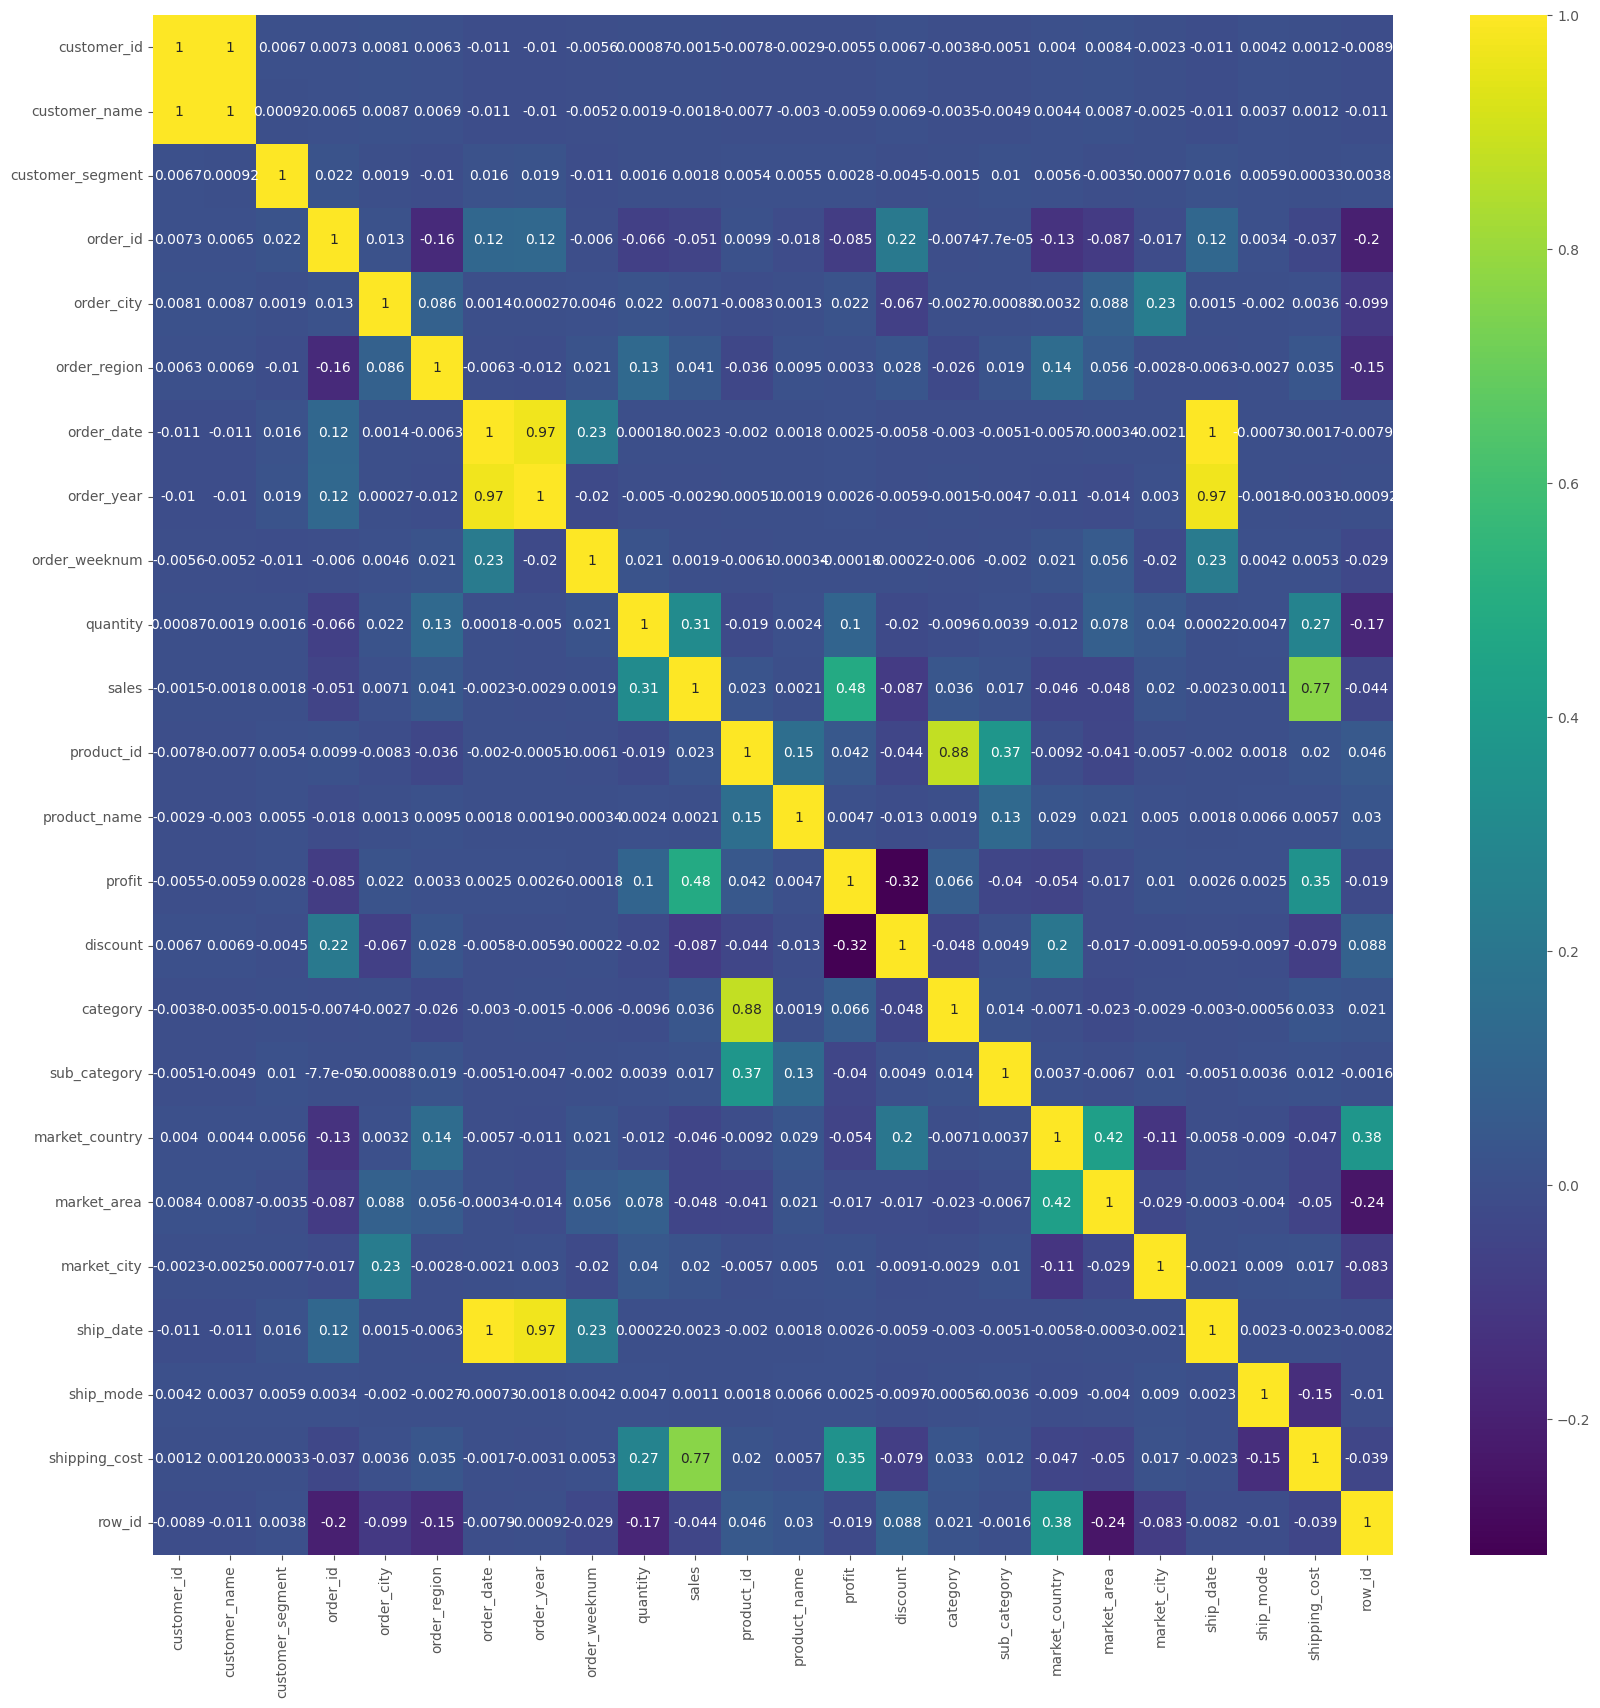

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(data_c.corr(numeric_only=True),annot=True,cmap='viridis')

<Axes: >

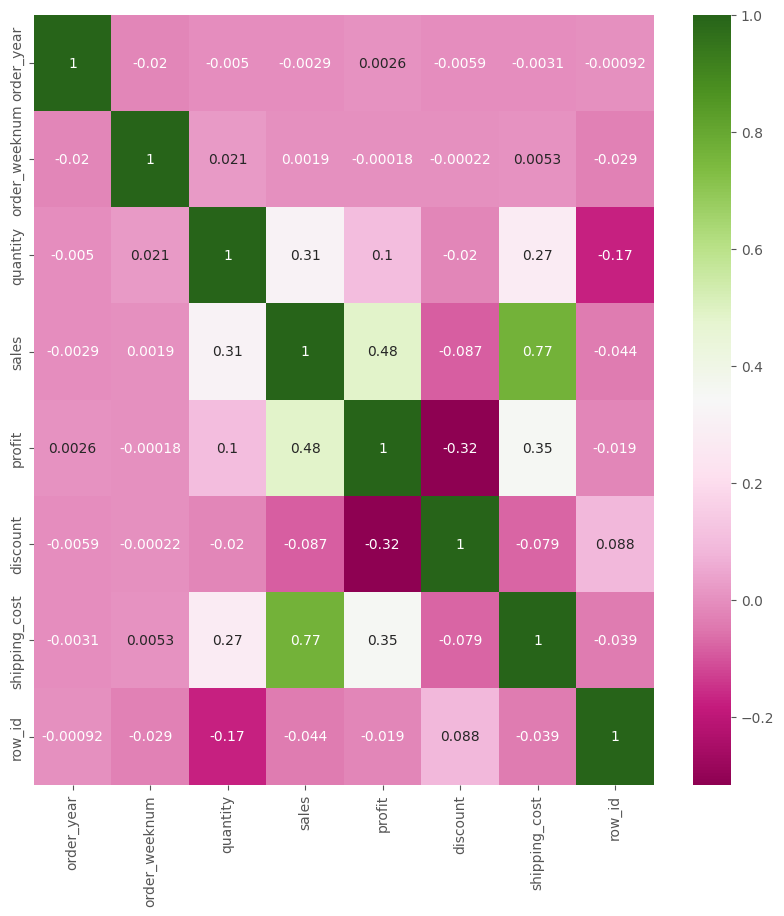

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='PiYG')

In [24]:
eta = data['ship_date'] - data['order_date']

### Loss Analysis
- Binders,Storage,Chairs,Art 세부 품목에서 정량적으로 저조한 실적을 보임.
- 비율로 봤을 때에는 Tables이 가장 타격이 크고, Machines,Bookcases,Phones을 위주로 분석해야함.
    - 번외로 금액적으로 타격이 큰 Machine(ind.47074)의 문제도 분석해야함.
- Discount의 비율을 줄일 필요가 존재함.

In [25]:
minus = data.loc[data['profit']<0]
#최고 손실액 거래
minus.loc[minus['profit']==minus['profit'].min()][con_col]

,quantity,sales,shipping_cost,profit,discount,row_id
47074,5,4500,451.63,-6599.978,0.7,39069


Text(0.5, 1.0, 'Feature Correlation of Loss Data')

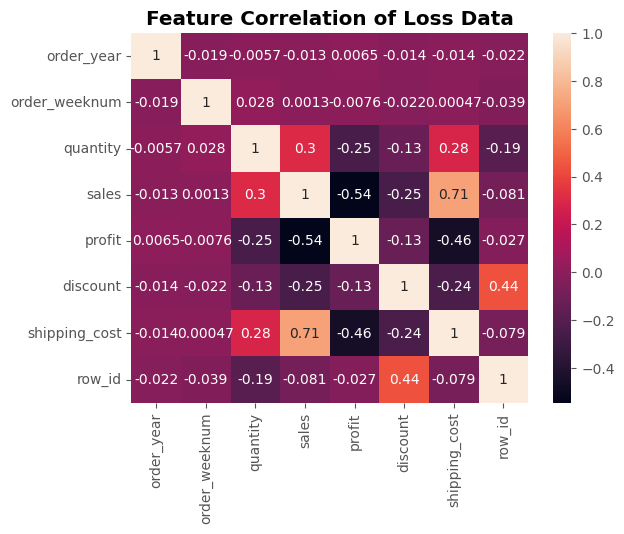

In [30]:
sns.heatmap(minus.corr(numeric_only=True),annot=True)
plt.title('Feature Correlation of Loss Data',weight='bold')

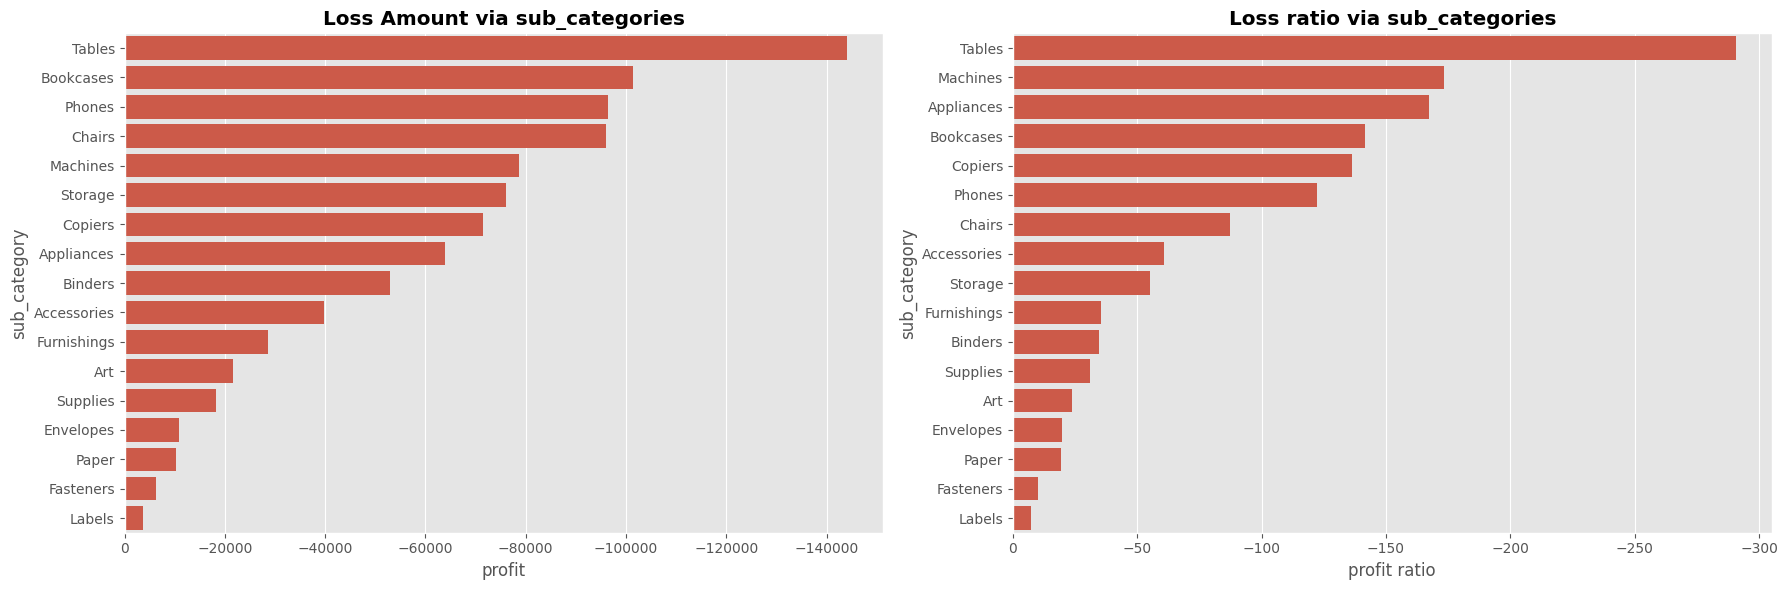

In [47]:
dam_ratio = minus.groupby('sub_category')['profit'].sum() / minus['sub_category'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프
sns.barplot(minus.groupby('sub_category')['profit'].sum().sort_values(ascending=True), orient='h', ax=axes[0])
axes[0].invert_xaxis()
axes[0].set_title('Loss Amount via sub_categories', weight='bold')

# 두 번째 그래프
sns.barplot(dam_ratio.sort_values(), orient='h', ax=axes[1])
axes[1].invert_xaxis()
axes[1].set_title('Loss ratio via sub_categories', weight='bold')
axes[1].set_xlabel('profit ratio')
plt.tight_layout()

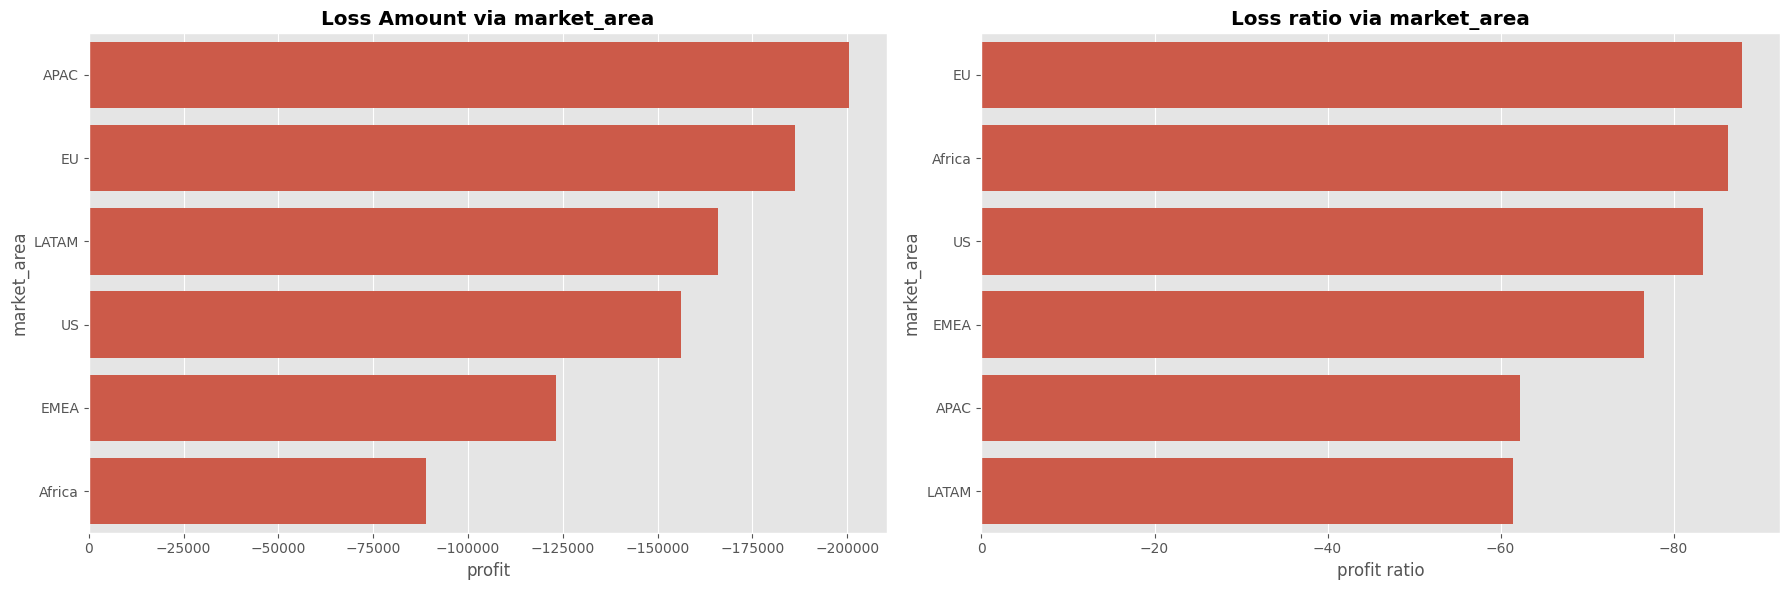

In [46]:
dam_ratio = minus.groupby('market_area')['profit'].sum() / minus['market_area'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프
sns.barplot(minus.groupby('market_area')['profit'].sum().sort_values(ascending=True), orient='h', ax=axes[0])
axes[0].invert_xaxis()
axes[0].set_title('Loss Amount via market_area', weight='bold')

# 두 번째 그래프
sns.barplot(dam_ratio.sort_values(), orient='h', ax=axes[1])
axes[1].invert_xaxis()
axes[1].set_title('Loss ratio via market_area', weight='bold')
axes[1].set_xlabel('profit ratio')
plt.tight_layout()


In [28]:
(minus['ship_date'] - minus['order_date']).value_counts().sort_values(ascending=False)

4 days    3569
5 days    2788
2 days    1726
6 days    1498
3 days    1212
7 days     737
0 days     628
1 days     386
Name: count, dtype: int64

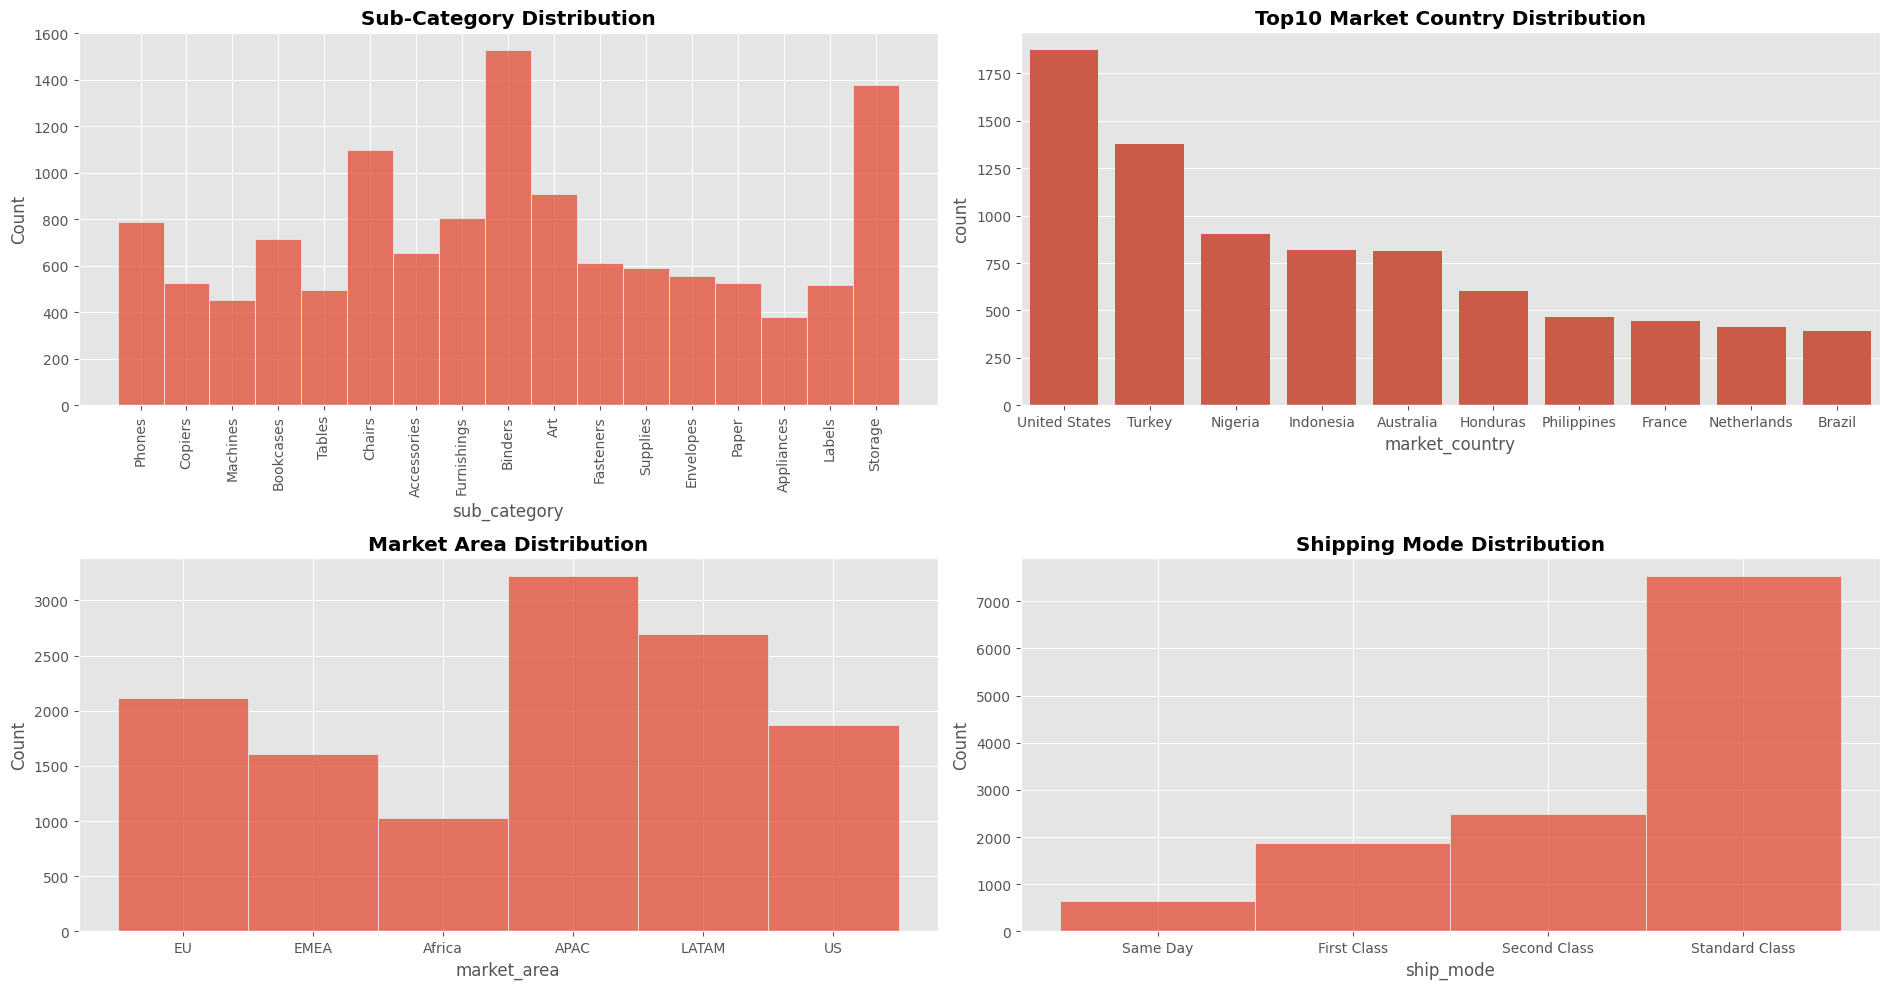

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(19, 10))
axes = axes.flatten()

# Plot for 'sub_category'
sns.histplot(minus['sub_category'], ax=axes[0])
axes[0].set_title('Sub-Category Distribution', weight='bold', loc='center')
axes[0].tick_params(axis='x',rotation=90)

# Plot for 'market_country'
sns.barplot(minus['market_country'].value_counts()[:10], ax=axes[1])
axes[1].set_title('Top10 Market Country Distribution', weight='bold', loc='center')

# Plot for 'market_area'
sns.histplot(minus['market_area'], ax=axes[2])
axes[2].set_title('Market Area Distribution', weight='bold', loc='center')

# Plot for 'ship_mode'
sns.histplot(minus['ship_mode'], ax=axes[3])
axes[3].set_title('Shipping Mode Distribution', weight='bold', loc='center')

plt.tight_layout()

#### 1. Tables
- US에서 납품하는 의자 중 상당수가 많은 손실을 낳고 있음 => 고칠 필요가 있어보임.
- Tables에서의 Discount가 손실에 상당한 영향을 끼치고 있음.
- ~~하지만 3%의 데이터(490여개) 만으로는 부족함~~

In [32]:
mt = minus.loc[minus['sub_category']=='Tables']

Text(0.5, 1.0, 'Correlation in Loss(Table) Data')

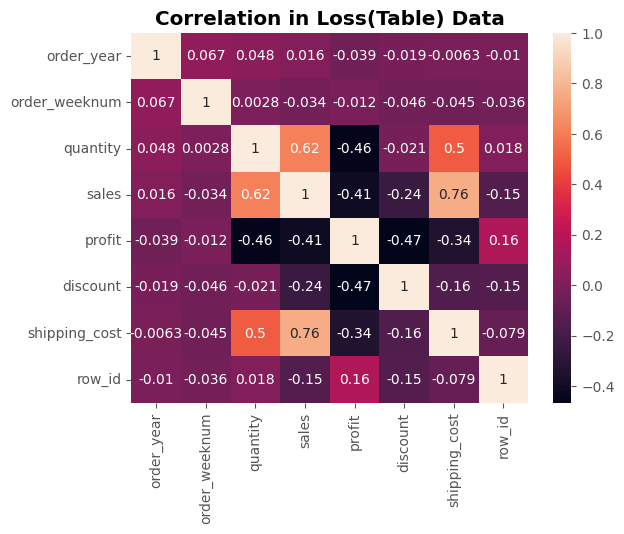

In [43]:
sns.heatmap(mt.corr(numeric_only=True),annot=True)
plt.title('Correlation in Loss(Table) Data',weight='bold')

In [ ]:
mt.loc[mt['profit'] == mt['profit'].min()][con_col]

,quantity,sales,shipping_cost,profit,discount,row_id
29652,8,2171,390.09,-2750.28,0.7,46219


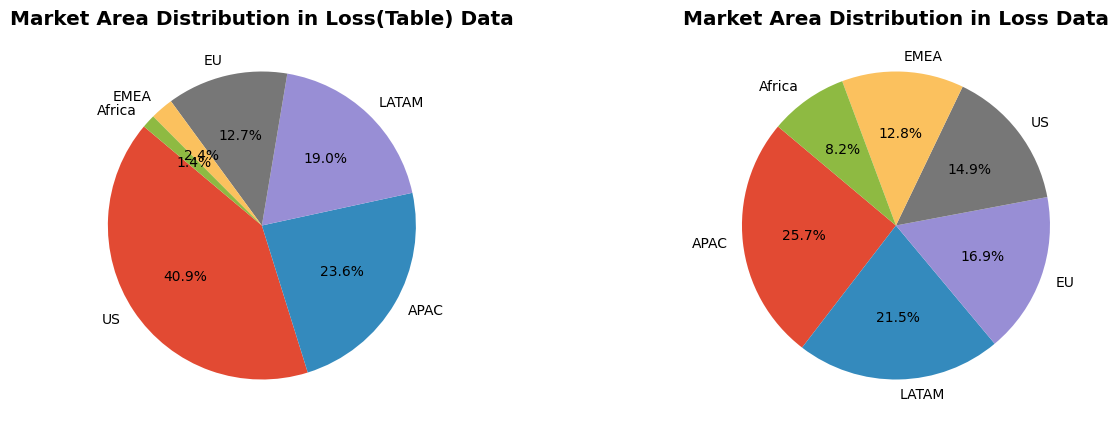

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart for 'Minus-Table' data
mt_market_area_counts = mt['market_area'].value_counts()
axes[0].pie(mt_market_area_counts, labels=mt_market_area_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Market Area Distribution in Loss(Table) Data', weight='bold')

# Pie chart for 'minus' data
minus_market_area_counts = minus['market_area'].value_counts()
axes[1].pie(minus_market_area_counts, labels=minus_market_area_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Market Area Distribution in Loss Data', weight='bold')

plt.show()

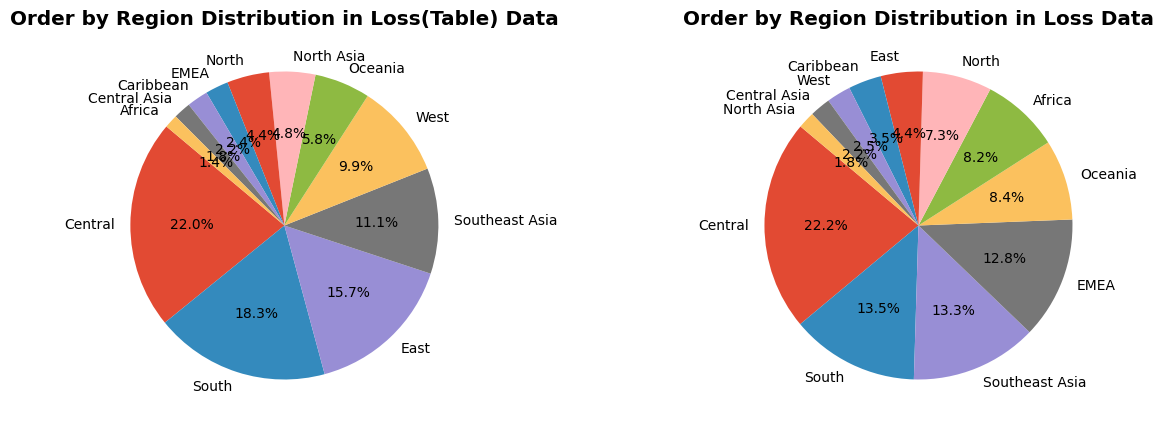

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart for 'Minus-Table' data
mt_market_area_counts = mt['order_region'].value_counts()
axes[0].pie(mt_market_area_counts, labels=mt_market_area_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Order by Region Distribution in Loss(Table) Data', weight='bold')

# Pie chart for 'minus' data
minus_market_area_counts = minus['order_region'].value_counts()
axes[1].pie(minus_market_area_counts, labels=minus_market_area_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Order by Region Distribution in Loss Data', weight='bold')

plt.show()